# 🔎 Step 1: Dataset Overview
- Check feature types (numeric, categorical).
- Look for missing values.
- Get descriptive statistics (mean, median, std).
- Understand the target variable (`Churn`).


In [13]:
# ================================
# 📦 1. Imports & Dataset Load
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("../data/Churn_Modelling.csv")   

print("✅ Dataset Shape:", df.shape)
print("\n📌 Missing Values:\n", df.isnull().sum())
print("\n📌 Data Types:\n", df.dtypes.value_counts())
print("\n📌 First 5 Rows:\n", df.head())


✅ Dataset Shape: (10002, 14)

📌 Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

📌 Data Types:
 int64      6
float64    5
object     3
Name: count, dtype: int64

📌 First 5 Rows:
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00        

# 🎯 Step 2: Target Variable
- Check **class imbalance**.
- Churn datasets often have **10–30% churn**.
- If imbalance is high → resampling / class weights needed later.


C:\Users\ghost\AppData\Local\Temp\ipykernel_18296\3791957163.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Exited", palette="Set2")


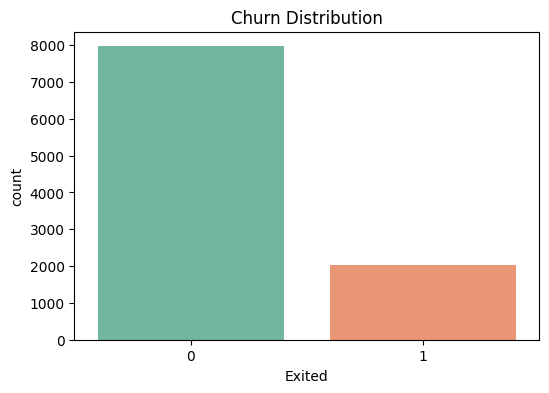

📊 Churn Rate: 20.38%
Exited
0    0.796241
1    0.203759
Name: proportion, dtype: float64


In [15]:
# ================================
# 🎯 2. Target Variable Analysis
# ================================
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Exited", palette="Set2")
plt.title("Churn Distribution")
plt.show()

churn_rate = df["Exited"].mean()*100
print(f"📊 Churn Rate: {churn_rate:.2f}%")
print(df["Exited"].value_counts(normalize=True))



# 👤 Step 3: Demographics
- Age skew → younger vs older churn tendency.  
- Gender imbalance check.  
- Geography impact (certain regions may churn more).  


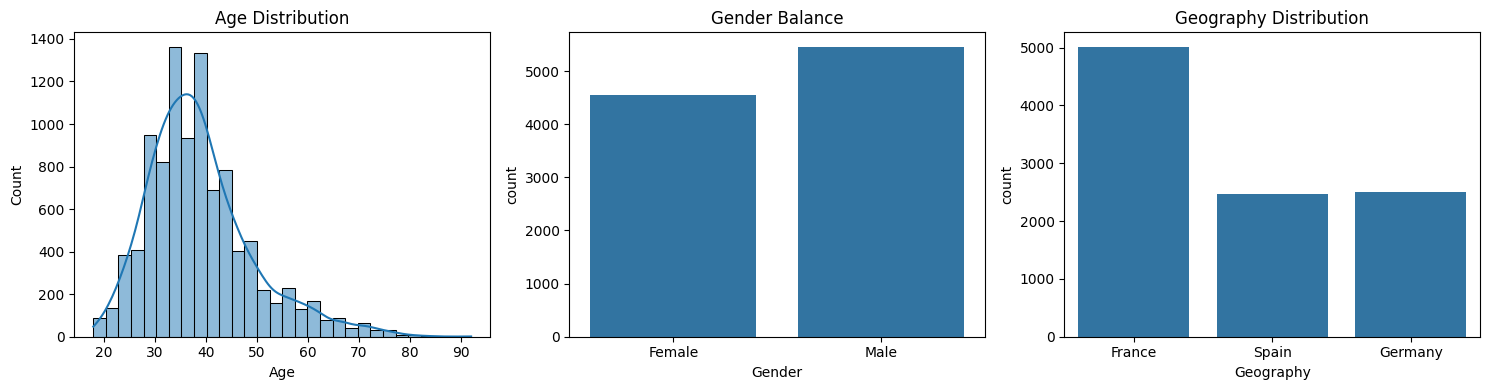


📌 Churn Rate by Gender:
 Gender
Female    0.250660
Male      0.164712
Name: Exited, dtype: float64

📌 Churn Rate by Geography:
 Geography
France     0.161548
Germany    0.324701
Spain      0.166734
Name: Exited, dtype: float64


In [16]:
# ================================
# 👤 3. Demographic Analysis
# ================================
fig, axs = plt.subplots(1,3, figsize=(15,4))

sns.histplot(df["Age"], bins=30, kde=True, ax=axs[0])
axs[0].set_title("Age Distribution")

sns.countplot(data=df, x="Gender", ax=axs[1])
axs[1].set_title("Gender Balance")

sns.countplot(data=df, x="Geography", ax=axs[2])
axs[2].set_title("Geography Distribution")

plt.tight_layout()
plt.show()

# Churn rate by group
print("\n📌 Churn Rate by Gender:\n", df.groupby("Gender")["Exited"].mean())
print("\n📌 Churn Rate by Geography:\n", df.groupby("Geography")["Exited"].mean())


# 💰 Step 4: Financial Features
- Compare churn vs non-churn distributions.  
- Example: Low balance customers might churn more.  
- Customers with multiple products may be "stickier".  


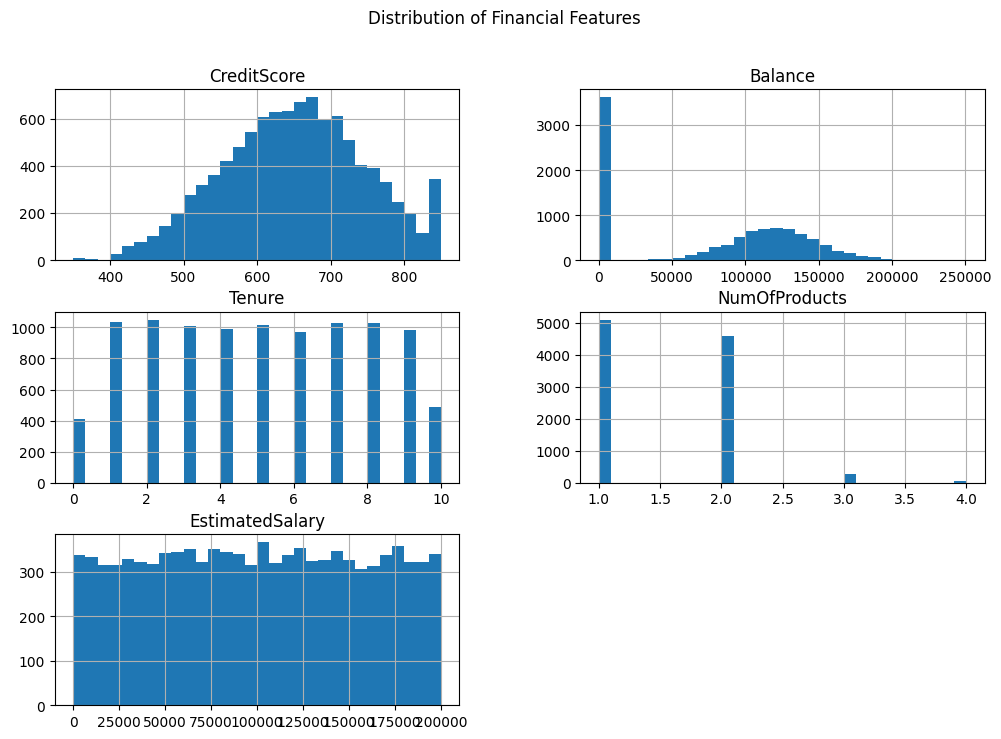

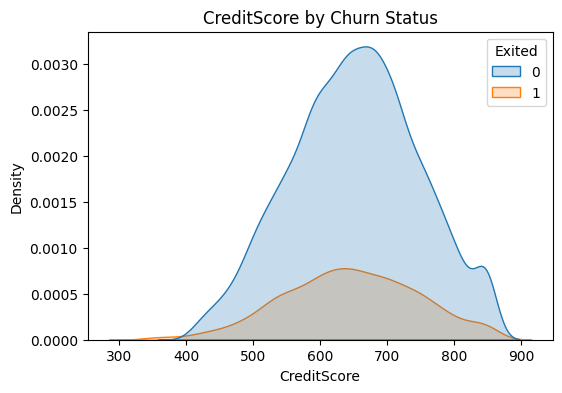

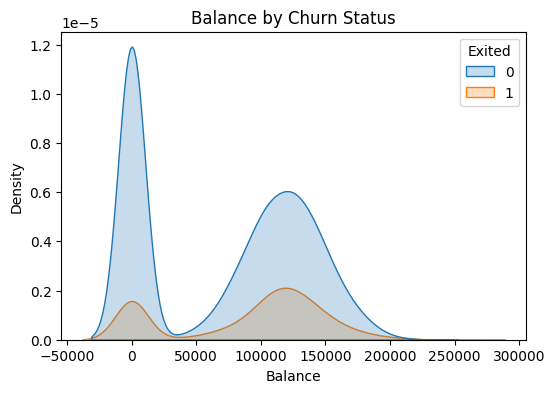

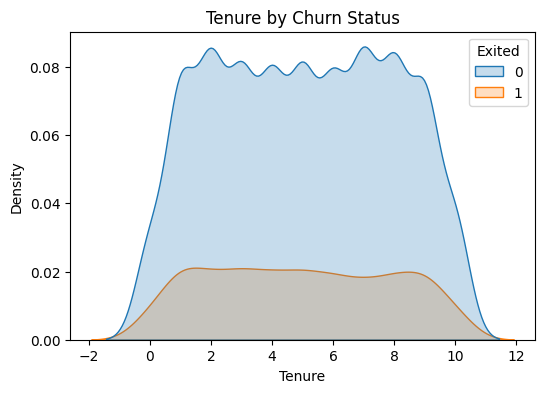

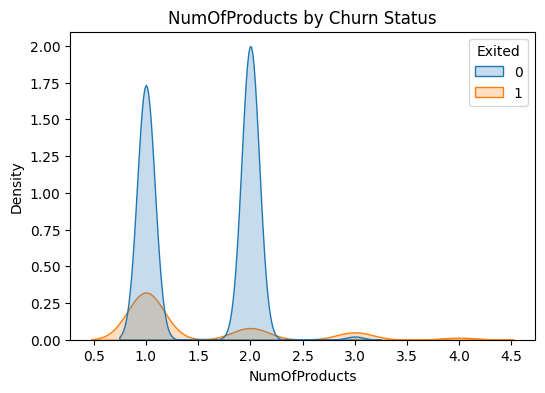

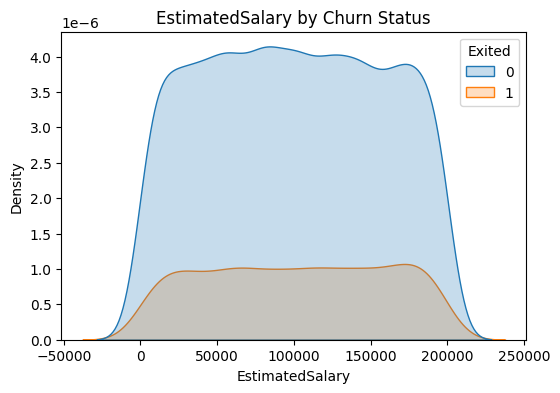


📌 Average values by Churn:
         CreditScore       Balance    Tenure  NumOfProducts  EstimatedSalary
Exited                                                                     
0        651.870794  72752.503898  5.033149       1.544199     99730.663543
1        645.413641  91100.672198  4.931796       1.475466    101461.468916


In [17]:
# ================================
# 💰 4. Account & Financial Features
# ================================
num_features = ["CreditScore", "Balance", "Tenure", "NumOfProducts", "EstimatedSalary"]

df[num_features].hist(figsize=(12,8), bins=30)
plt.suptitle("Distribution of Financial Features")
plt.show()

# Compare distributions for churned vs non-churned
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue="Exited", fill=True)
    plt.title(f"{col} by Churn Status")
    plt.show()

print("\n📌 Average values by Churn:\n", df.groupby("Exited")[num_features].mean())

# 📊 Step 5: Correlations
- Check which features are strongly correlated with churn.  
- High inter-feature correlation → potential multicollinearity.  


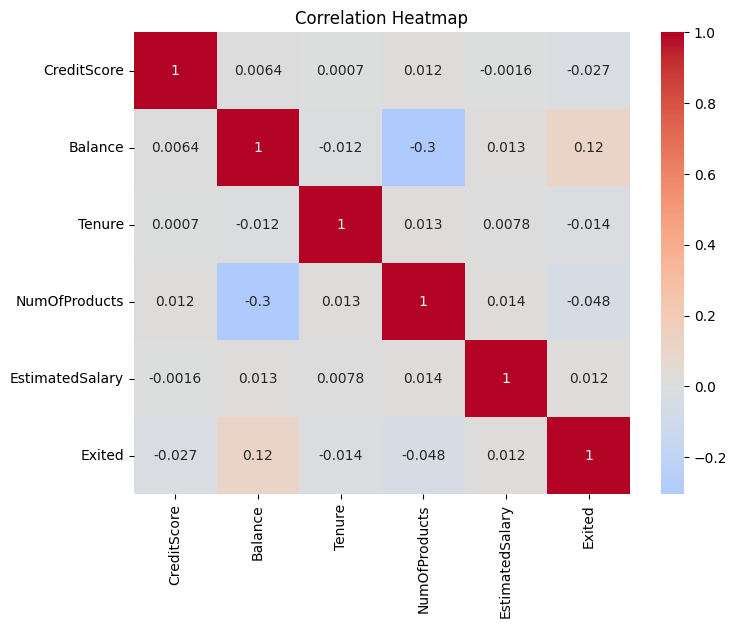


📌 Correlation with Churn:
 Exited             1.000000
Balance            0.118456
EstimatedSalary    0.012123
Tenure            -0.014117
CreditScore       -0.026909
NumOfProducts     -0.047601
Name: Exited, dtype: float64


In [18]:
# ================================
# 📊 5. Correlation & Multicollinearity
# ================================
corr = df[num_features + ["Exited"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

print("\n📌 Correlation with Churn:\n", corr["Exited"].sort_values(ascending=False))


CreditScore: Skew = -0.07


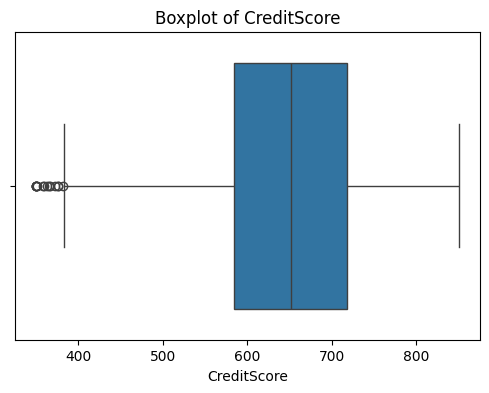

Balance: Skew = -0.14


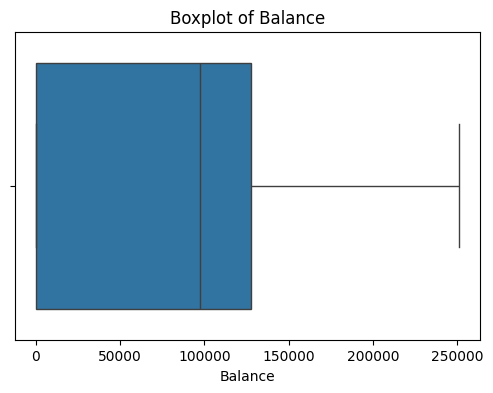

Tenure: Skew = 0.01


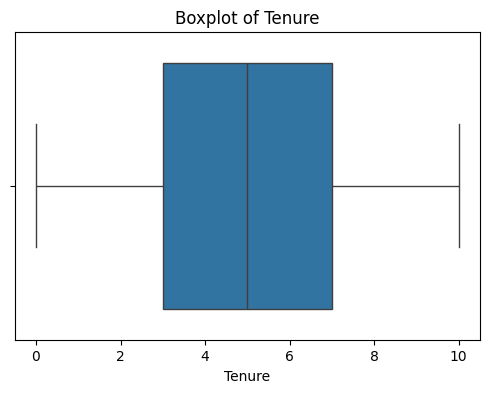

NumOfProducts: Skew = 0.75


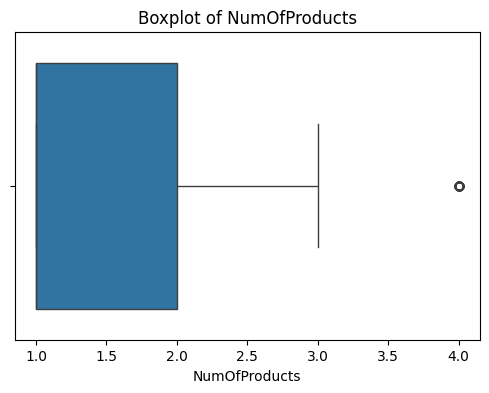

EstimatedSalary: Skew = 0.00


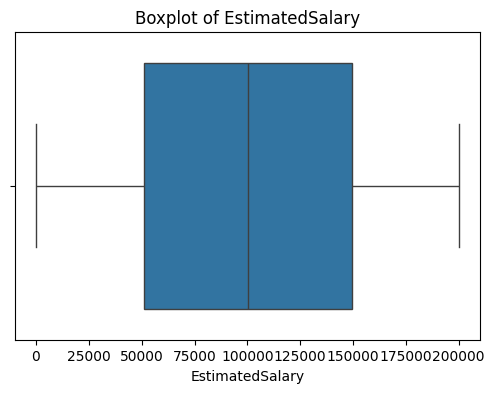

In [19]:
# ================================
# ⚠️ 6. Outliers & Skewness
# ================================
for col in num_features:
    col_skew = skew(df[col].dropna())
    print(f"{col}: Skew = {col_skew:.2f}")
    
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


# 📊 Customer Churn EDA – Key Observations

- **Missing Values**: Minimal (Geography, Age, HasCrCard, IsActiveMember). → Can impute.  
- **Churn Rate**: 20.38% (imbalanced dataset).  
- **Customer Insights**:  
  - Churners have **lower CreditScore** and **fewer products**.  
  - Churners have **higher average balances** (potential high-value customers leaving).  
- **Correlation**: No strong single predictor. Balance shows mild positive relation; more products reduces churn risk.  
- **Business Insight**: Retention focus needed on **high-balance, low-product customers**.  

---


# Preprocessing and FeatureEngineering

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# =========================
# Custom Feature Engineering
# =========================
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        # Balance to Salary ratio
        X["BalanceSalaryRatio"] = X["Balance"] / (X["EstimatedSalary"] + 1)
        # Age buckets
        X["AgeGroup"] = pd.cut(X["Age"], bins=[0, 30, 50, 100], labels=["Young", "Middle", "Senior"])
        # Tenure buckets
        X["TenureGroup"] = pd.cut(X["Tenure"], bins=[-1, 3, 7, 10], labels=["Low", "Medium", "High"])
        # Interaction: Active * Products
        X["Active_Product"] = X["IsActiveMember"] * X["NumOfProducts"]
        return X

# =========================
# Define Features
# =========================
numeric_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
categorical_features = ["Geography", "Gender", "AgeGroup", "TenureGroup"]

# Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first"))
])

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"
)

# =========================
# Final Pipeline
# =========================
pipeline = Pipeline(steps=[
    ("feature_eng", FeatureEngineer()),
    ("preprocessor", preprocessor)
])





In [22]:

X = df.drop("Exited", axis=1)  
y = df["Exited"]     

# Apply preprocessing + feature engineering
X_prep = pipeline.fit_transform(X)

# Get feature names from preprocessing
feature_names_num = numeric_features
feature_names_cat = pipeline.named_steps["preprocessor"]\
    .named_transformers_["cat"].named_steps["encoder"].get_feature_names_out(categorical_features)

# Combine into final feature names
feature_names = np.concatenate([feature_names_num, feature_names_cat])

# Convert to DataFrame
X_prep_df = pd.DataFrame(X_prep, columns=feature_names, index=X.index)

# Add target back
final_df = pd.concat([X_prep_df, y], axis=1)

# Save to CSV
final_df.to_csv("../data/preprocessed_churn.csv", index=False)

print("✅ Final preprocessed dataset saved to preprocessed_churn.csv")

✅ Final preprocessed dataset saved to preprocessed_churn.csv
